# Exploratory Data analysis 
This is EDA done on the imputed dataset done by Abhinav Tembulkar

### Importing Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data preprocessing

In [2]:
df = pd.read_csv('imputed_dataset.csv')
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,Location,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Job_Title,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,4168,11,4,45,3585,7,0,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
1,4168,11,4,45,3298,7,1,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
2,4168,11,4,45,3298,7,2,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
3,4168,11,4,45,3585,7,3,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
4,4168,11,4,45,3298,7,4,880,5,7,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0


In [3]:
#Renaming the questions in columns with relevant name

# Dictionary mapping old column names to new shorter names
column_rename_map = {
    'Duration (in seconds)': 'Duration',
    'What is your age (# years)?': 'Age',
    'What is your gender? - Selected Choice': 'Gender',
    'Location': 'Location',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education',
    'Job_Title': 'JobTitle',
    'Select the title most similar to your current role (or most recent title if retired): - Other - Text': 'RoleTitleText',
    'What is the size of the company where you are employed?': 'CompanySize',
    'Approximately how many individuals are responsible for data science workloads at your place of business?': 'DataScienceTeamSize',
    'Does your current employer incorporate machine learning methods into their business?': 'MLIncorporation',
    'Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text': 'WorkRoleActivitiesText',
    'What is your current yearly compensation (approximate $USD)?': 'YearlyCompensation',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?': 'MLCloudSpending',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)': 'FavMediaKaggle',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)': 'FavMediaBlogs',
    'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text': 'FavMediaOtherText',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera': 'CoursesCoursera',
    'On which platforms have you begun or completed data science courses? (Select all that apply) - Other - Text': 'CoursesOtherText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice': 'PrimaryToolSelected',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text': 'PrimaryToolBasicStatText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text': 'PrimaryToolAdvStatText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text': 'PrimaryToolBizIntelligenceText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Local development environments (RStudio, JupyterLab, etc.) - Text': 'PrimaryToolLocalDevText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text': 'PrimaryToolCloudDataText',
    'What is the primary tool that you use at work or school to analyze data? (Include text response) - Other - Text': 'PrimaryToolOtherText',
    'How long have you been writing code to analyze data (at work or at school)?': 'CodeWritingExperience',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)': 'IDEsJupyter',
    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?  (Select all that apply) - Other - Text': 'IDEsOtherText',
    'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Other - Text': 'HostedNotebooksOtherText',
    'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python': 'LanguagesPython',
    'What programming languages do you use on a regular basis? (Select all that apply) - Other - Text': 'LanguagesOtherText',
    'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice': 'RecommendedLangSelected',
    'What programming language would you recommend an aspiring data scientist to learn first? - Other - Text': 'RecommendedLangOtherText',
    'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib ': 'VizToolsMatplotlib',
    'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Other - Text': 'VizToolsOtherText',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs': 'HardwareCPUs',
    'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Other - Text': 'HardwareOtherText',
    'Have you ever used a TPU (tensor processing unit)?': 'UsedTPU',
    'For how many years have you used machine learning methods?': 'MLExperienceYears',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression': 'MLAlgosLogisticReg',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Decision Trees or Random Forests': 'MLAlgosDecisionTrees',
    'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Other - Text': 'MLAlgosOtherText',
    'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Other - Text': 'MLToolsCategoriesOtherText',
    'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Other - Text': 'CVMethodsCategoriesOtherText',
    'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Other - Text': 'NLPMethodsOtherText',
    'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ': 'MLFrameworksScikit',
    'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Other - Text': 'MLFrameworksOtherText',
    'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Other - Text': 'CloudPlatformsOtherText',
    'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Other - Text': 'CloudProductsOtherText',
    'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Other - Text': 'BigDataProductsOtherText',
    'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Other - Text': 'MLProductsOtherText',
    'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Other - Text': 'AutoMLToolsOtherText',
    'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text': 'DBProductsOtherText',
    #Other column renames here:
    'Unnamed: 0': 'Unnamed',
    'job_id': 'JobID',
    'company_name': 'CompanyName',
    'description': 'Description',
    'Salary_Max': 'SalaryMax',
    'pay_period': 'PayPeriod',
    'company_id': 'CompanyID',
    'views': 'Views',
    'Salary_Min': 'SalaryMin',
    'formatted_work_type': 'WorkType',
    'applies': 'Applies',
    'original_listed_time': 'ListedTime',
    'job_posting_url': 'JobPostingURL',
    'application_url': 'ApplicationURL',
    'application_type': 'ApplicationType',
    'expiry': 'Expiry',
    'formatted_experience_level': 'ExperienceLevel',
    'listed_time': 'ListedTime',
    'posting_domain': 'PostingDomain',
    'sponsored': 'Sponsored',
    'work_type': 'WorkType',
    'currency': 'Currency',
    'compensation_type': 'CompensationType',
    'normalized_salary': 'NormalizedSalary',
    'zip_code': 'ZipCode',
    'fips': 'FIPS'
}

# Rename columns
df.rename(columns=column_rename_map, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Duration', 'Age', 'Gender',
       'What is your gender? - Prefer to self-describe - Text', 'Location',
       'Education', 'JobTitle', 'RoleTitleText', 'CompanySize',
       'DataScienceTeamSize',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=334)


In [4]:
#Selecting the Relevant Columns
relevant_columns = [
    'Age', 
    'Gender', 
    'Location', 
    'Education', 
    'JobTitle', 
    'CompanySize', 
    'DataScienceTeamSize', 
    'MLIncorporation', 
    'YearlyCompensation', 
    'MLCloudSpending', 
    'CoursesCoursera', 
    'PrimaryToolSelected', 
    'CodeWritingExperience', 
    'LanguagesPython', 
    'MLExperienceYears', 
    'SalaryMax', 
    'SalaryMin', 
    'NormalizedSalary', 
    'WorkType', 
    'ExperienceLevel'
]

# Select the relevant columns from merged_df
selected_df = df[relevant_columns]

# Display the first few rows of the selected DataFrame
print(selected_df.head())

   Age  Gender  Location  Education  JobTitle  CompanySize  \
0   11       4      3585          7         0            5   
1   11       4      3298          7         1            5   
2   11       4      3298          7         2            5   
3   11       4      3585          7         3            5   
4   11       4      3298          7         4            5   

   DataScienceTeamSize  MLIncorporation  YearlyCompensation  MLCloudSpending  \
0                    7                6                  25                6   
1                    7                6                  25                6   
2                    7                6                  25                6   
3                    7                6                  25                6   
4                    7                6                  25                6   

   ...  PrimaryToolSelected  CodeWritingExperience  LanguagesPython  \
0  ...                    6                      7                1   
1  .

In [5]:
df.drop('What is your gender? - Prefer to self-describe - Text', axis=1, inplace=True)

In [6]:
df.columns

Index(['Duration', 'Age', 'Gender', 'Location', 'Education', 'JobTitle',
       'RoleTitleText', 'CompanySize', 'DataScienceTeamSize',
       'MLIncorporation',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=333)

In [9]:
# df.to_csv('imputed_renamed_dataset.csv', index=False)

### Data preprocessing

In [56]:
df = pd.read_csv('imputed_renamed_dataset.csv',nrows=6000)
df.head()

,Duration,Age,Gender,Location,Education,JobTitle,RoleTitleText,CompanySize,DataScienceTeamSize,MLIncorporation,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,4168,11,4,3585,7,0,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
1,4168,11,4,3298,7,1,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
2,4168,11,4,3298,7,2,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
3,4168,11,4,3585,7,3,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0
4,4168,11,4,3298,7,4,880,5,7,6,...,63450.4,61701.4,82566.0,138062.4,28056.0,25121.6,55341.0,69001.4,68507.6,71259.0


In [12]:
df.columns

Index(['Duration', 'Age', 'Gender', 'Location', 'Education', 'JobTitle',
       'RoleTitleText', 'CompanySize', 'DataScienceTeamSize',
       'MLIncorporation',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=333)

In [ ]:
Rahul Lotlikar Task 2

### Question 1
How does the industry influence yearly compensation?<br>
This hypothesis suggests that some industries might offer significantly higher average yearly compensation than others, reflecting the economic value and demand for skills specific to those industries.<br>
<b>Significance:</b><br>
    
This question is crucial for understanding the dynamics of educational investment and its return in the professional sphere. It helps in assessing whether higher education leads to better job opportunities and positions within companies, which is valuable information for individuals considering advanced degrees. The insights derived can guide career planning, educational policies, and corporate hiring practices, showing how educational qualifications align with job market demands.

<b>Hypothesis 1</b><br>
Yearly compensation varies significantly across different industries.



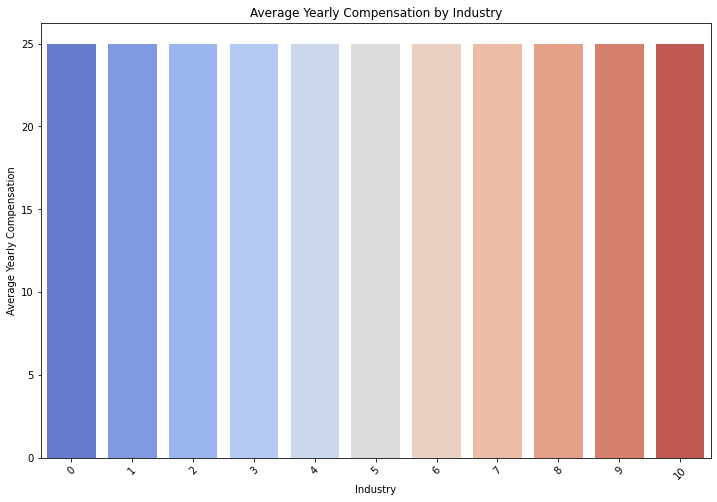

In [57]:
industry_compensation = df.groupby('Industry')['YearlyCompensation'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=industry_compensation.index, y=industry_compensation.values, palette='coolwarm')
plt.title('Average Yearly Compensation by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=45)
plt.show()

### Question 2
 How does educational attainment influence compensation across different industries?
 
 <br>
<b>Significance:</b><br>
    
By analyzing compensation through the lens of education across industries, stakeholders can better align educational offerings, workforce training, and economic policies with the evolving demands of the job market.

<b>Hypothesis 1</b><br>
Higher educational levels correlate with higher compensation across various industries.
This hypothesis assumes that as the level of education increases, so does the compensation, reflecting the value and demand for higher educational credentials in the job market across different sectors.

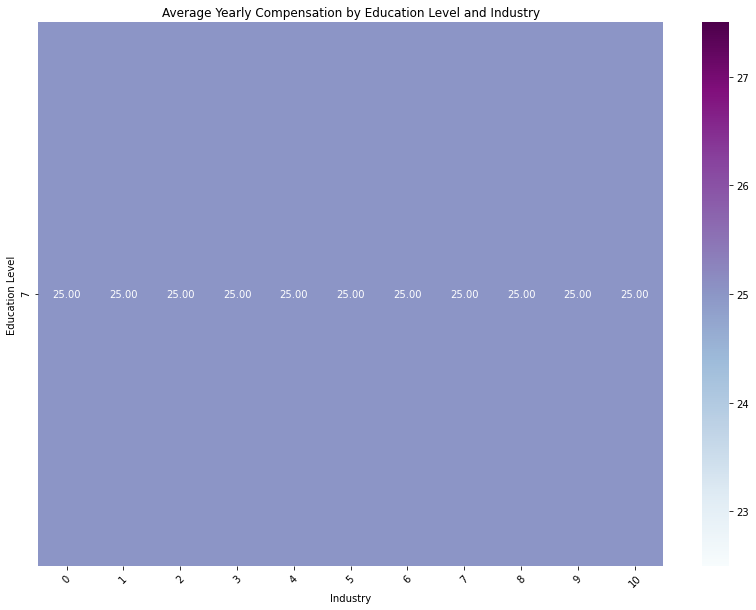

In [60]:
education_compensation = df.groupby(['Education', 'Industry'])['YearlyCompensation'].mean().unstack()

plt.figure(figsize=(14, 10))
sns.heatmap(education_compensation, annot=True, cmap="BuPu", fmt=".2f")
plt.title('Average Yearly Compensation by Education Level and Industry')
plt.xlabel('Industry')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.show()

Across all job titles, we can see that people who learn from online platforms like coursera, have higher ML experience. 

## Question 2
How does location influence employment prospects, and is relocating beneficial for career advancement?

<b>Hypothesis</b><br>
Areas with a high percentage of technology and finance will have much higher medians and a great number of job opportunities, thus often making relocation a good career development strategy.

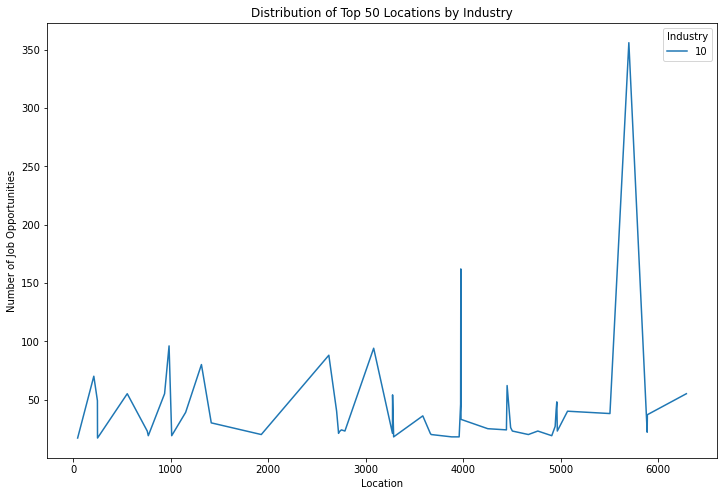

In [61]:
# Filter for top N locations based on some criterion, e.g., total job opportunities
top_locations = df.groupby('Location').size().nlargest(50).index
filtered_data = df[df['Location'].isin(top_locations)]


# Group and plot
plot_data = filtered_data.groupby(['Location', 'Industry']).size().unstack(fill_value=0)
plot_data.plot(kind='line', stacked=True, figsize=(12, 8))
plt.title('Distribution of Top 50 Locations by Industry')
plt.ylabel('Number of Job Opportunities')
plt.show()


In [62]:
top_locations

Int64Index([5699, 3975,  982, 3081, 2621, 1314,  210, 4450,  553,  936, 6289,
            3275,  247, 4960, 3973, 4953, 2701, 5070, 1152, 5505, 5889, 3585,
            3977, 1415, 4943, 4486, 4252, 2750, 4443,  758, 2786, 4504, 4765,
            4965, 2723, 5887, 2721, 3274, 3662, 1928, 3671, 4668,  769, 1009,
            4908, 3286, 3881, 3958,   44,  248],
           dtype='int64', name='Location')

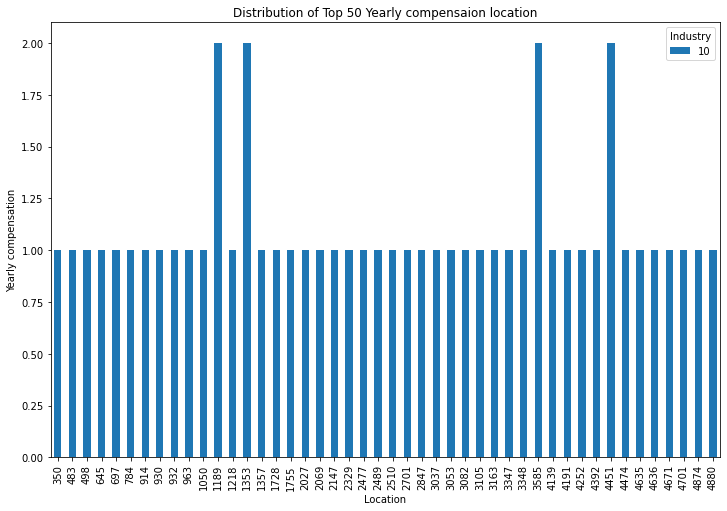

<b> Task 5 </b>
Question 1: How does industry affect yearly compensation across different education levels?<br?
Hypothesis 1: Higher education levels correlate with higher yearly compensation in most industries.<br>
Hypothesis 2: Compensation disparities based on education levels are more pronounced in tech and finance industries than in other sectors.



Descriptive Statistics for Yearly Compensation:
count    6000.0
mean       25.0
std         0.0
min        25.0
25%        25.0
50%        25.0
75%        25.0
max        25.0
Name: YearlyCompensation, dtype: float64


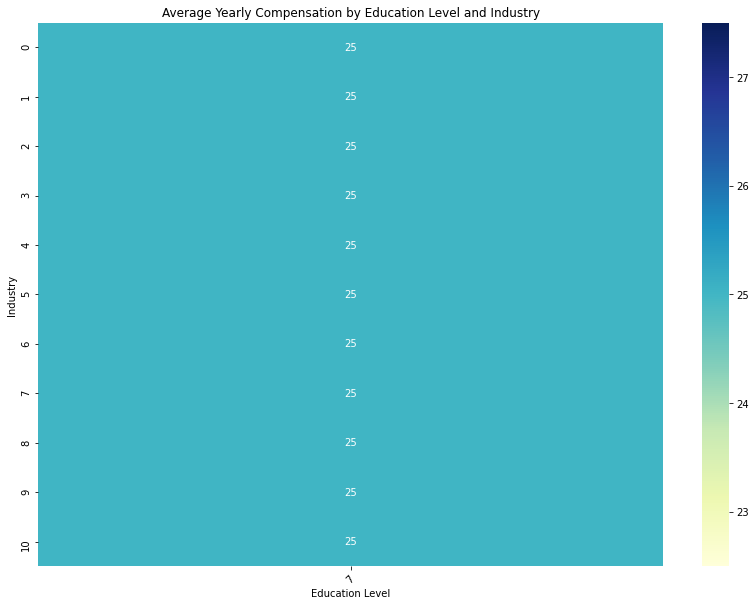

In [68]:
print("Descriptive Statistics for Yearly Compensation:")
print(df['YearlyCompensation'].describe())




# Hypothesis 1.1: Higher education levels correlate with higher yearly compensation in most industries.

# Grouping data by Industry and Education to get the average YearlyCompensation
industry_education_compensation = df.groupby(['Industry', 'Education'])['YearlyCompensation'].mean().unstack()

# Visualization of the average compensation by education level across industries
plt.figure(figsize=(14, 10))
sns.heatmap(industry_education_compensation, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Average Yearly Compensation by Education Level and Industry')
plt.xlabel('Education Level')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()



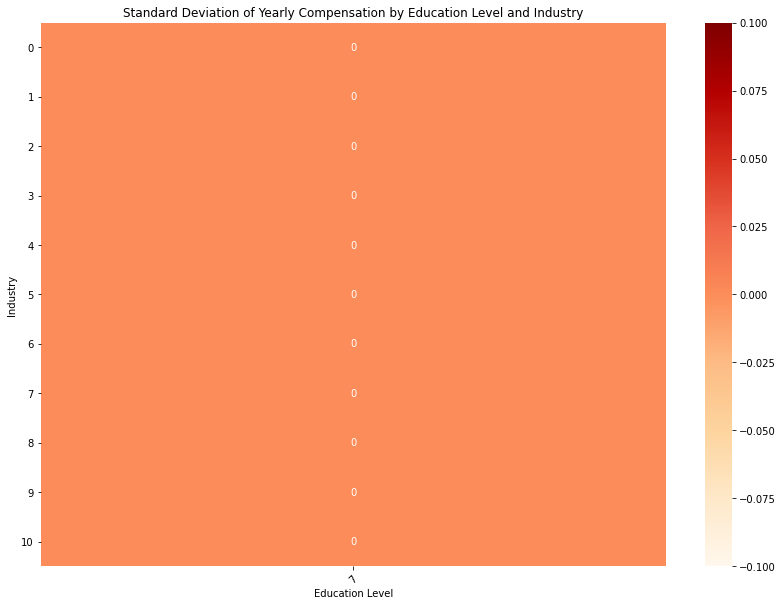

In [70]:
compensation_variance_by_education_industry = df.groupby(['Industry', 'Education'])['YearlyCompensation'].std().unstack()

# Visualization of the standard deviation of compensation by education level across industries
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(compensation_variance_by_education_industry, annot=True, cmap="OrRd", fmt=".0f")
plt.title('Standard Deviation of Yearly Compensation by Education Level and Industry')
plt.xlabel('Education Level')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Question 2: What is the relationship between age and yearly compensation, and how does it vary across different job titles?

Hypothesis 1: Older individuals generally earn more than younger individuals due to experience, except in fast-moving fields like technology.
Hypothesis 2: Senior-level positions (e.g., managers, directors) show a significant increase in compensation with age compared to junior-level roles.

c:\users\riyal\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\users\riyal\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


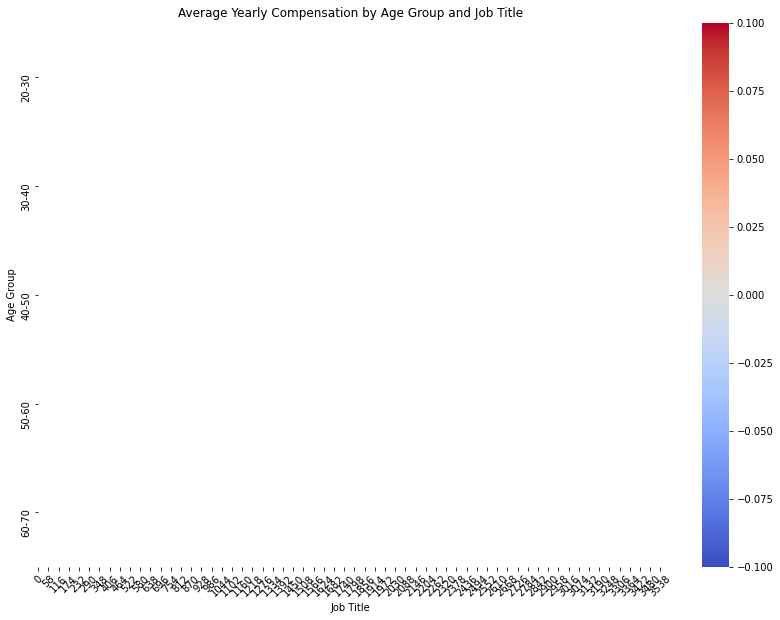

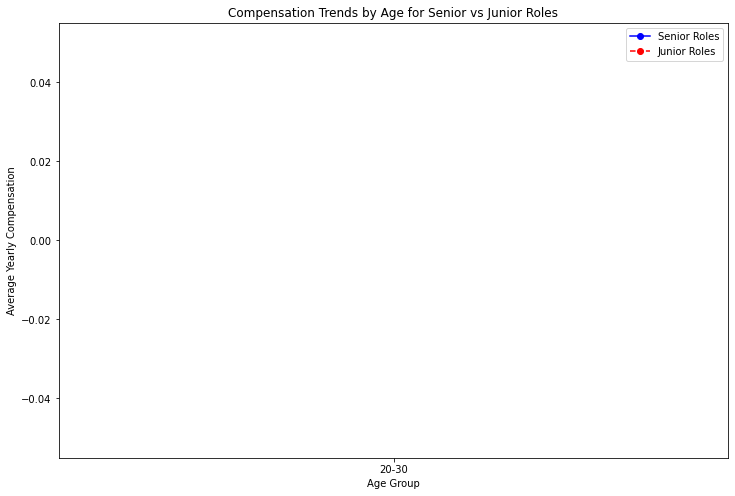

In [69]:
# Hypothesis 2.1: Older individuals earn more due to experience, except in fast-moving fields like technology.

# Create age bins for visualization
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Group by AgeGroup and JobTitle to get average yearly compensation
age_compensation = df.groupby(['AgeGroup', 'JobTitle'])['YearlyCompensation'].mean().unstack()

# Visualization of average yearly compensation across age groups and job titles
plt.figure(figsize=(14, 10))
sns.heatmap(age_compensation, annot=True, cmap="coolwarm", fmt=".0f")
plt.title('Average Yearly Compensation by Age Group and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

# Hypothesis 2.2: Senior-level positions show significant compensation increases with age compared to junior roles.

# Filter data for senior and junior positions
senior_roles = ['Manager', 'Director', 'Executive']
junior_roles = ['Junior Developer', 'Intern']

senior_compensation = df[df['JobTitle'].isin(senior_roles)].groupby('AgeGroup')['YearlyCompensation'].mean()
junior_compensation = df[df['JobTitle'].isin(junior_roles)].groupby('AgeGroup')['YearlyCompensation'].mean()

# Plot comparison of compensation by age group for senior and junior roles
plt.figure(figsize=(12, 8))
plt.plot(senior_compensation.index, senior_compensation.values, label='Senior Roles', marker='o', linestyle='-', color='blue')
plt.plot(junior_compensation.index, junior_compensation.values, label='Junior Roles', marker='o', linestyle='--', color='red')
plt.title('Compensation Trends by Age for Senior vs Junior Roles')
plt.xlabel('Age Group')
plt.ylabel('Average Yearly Compensation')
plt.legend()
plt.show()
